In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mne

In [2]:
raw = mne.io.read_raw_eeglab('sep_uwgr_prepro.set', preload=False)

Reading /data/u_brenner_software/eeg_data_analysis/eeg_llm/sep_uwgr_prepro.fdt


/tmp/ipykernel_66283/2498423444.py:1: RuntimeWarning: Estimated head radius (0.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = mne.io.read_raw_eeglab('sep_uwgr_prepro.set', preload=False)


In [3]:
events, event_id = mne.events_from_annotations(raw)

tmin = -0.05
tmax = 0.22

epochs = mne.Epochs(raw, events, event_id, tmin, tmax, baseline=None, preload=False)

Used Annotations descriptions: ['1']
Not setting metadata
6038 matching events found
No baseline correction applied
0 projection items activated


In [200]:
all_data = epochs.get_data()

Loading data for 6038 events and 554 original time points ...
0 bad epochs dropped


Loading data for 1 events and 554 original time points ...
0 bad epochs dropped


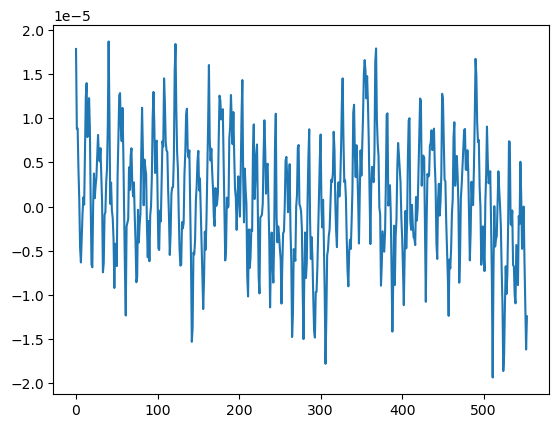

In [170]:
single_epoch = epochs[6000]
#single_epoch.plot()
plt.plot(single_epoch.get_data()[0,5])

In [4]:
avg_data = epochs.average().data

In [135]:
data_subset = epochs[100:]

In [136]:
avg_subset = data_subset.average().data

In [172]:
U, S, Vh = np.linalg.svd(avg_data[:369], full_matrices=True)

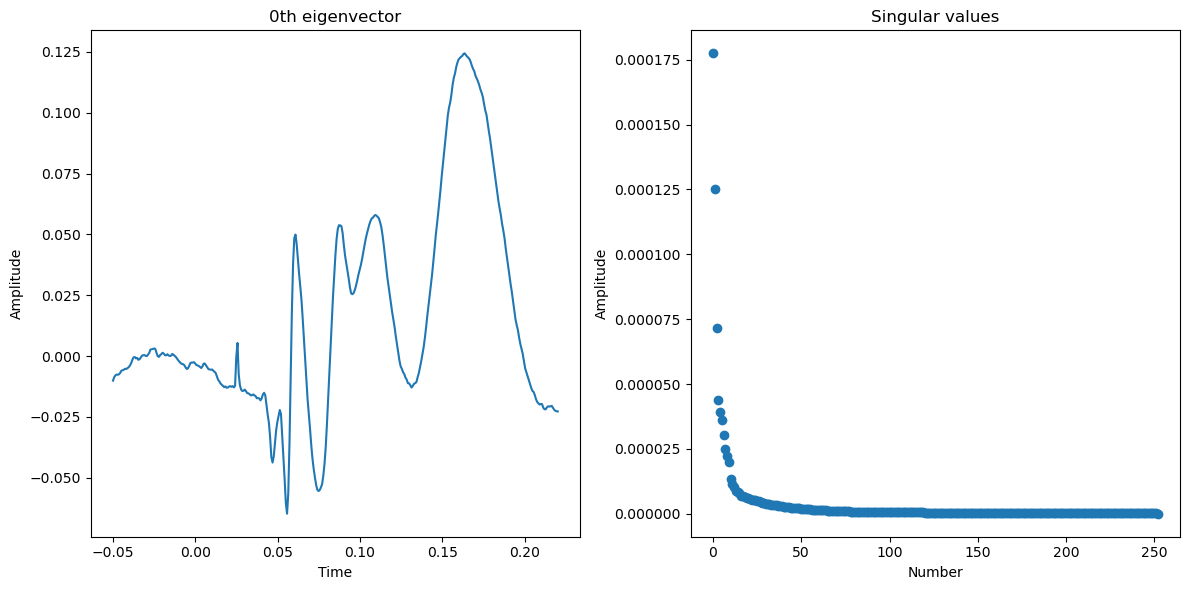

In [173]:
timepoints = np.linspace(tmin, tmax, 369)

# Create a figure with two subplots side-by-side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot on the first subplot
eig_n = 0
ax1.plot(timepoints, Vh[eig_n,:369])
ax1.set_title(str(eig_n) + 'th eigenvector')
ax1.set_xlabel('Time')
ax1.set_ylabel('Amplitude')

# Plot on the second subplot
ax2.plot(S,'o')
ax2.set_title('Singular values')
ax2.set_xlabel('Number')
ax2.set_ylabel('Amplitude')

# Display the plots
plt.tight_layout()
plt.show()

In [208]:
proj_U1 = np.dot(U.T[0], all_data)
proj_U2 = np.dot(U.T[1], all_data)

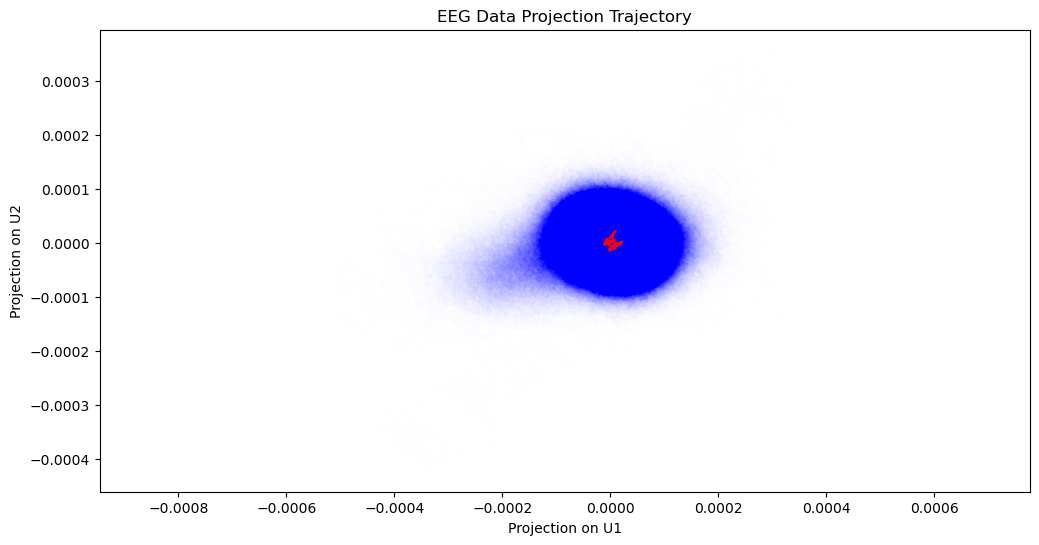

In [216]:
# Plot the trajectory (proj_U1 vs proj_U2)
plt.figure(figsize=(12, 6))
for trial_U1, trial_U2 in zip(proj_U1, proj_U2):
    plt.plot(trial_U1, trial_U2, alpha=0.002, color='blue')  # Each trial

plt.plot(S[0]*Vh[0], S[1]*Vh[1], color='red')

# Add labels and title
plt.xlabel('Projection on U1')
plt.ylabel('Projection on U2')
plt.title('EEG Data Projection Trajectory')

# Show the plot
plt.axis('equal')
plt.show()

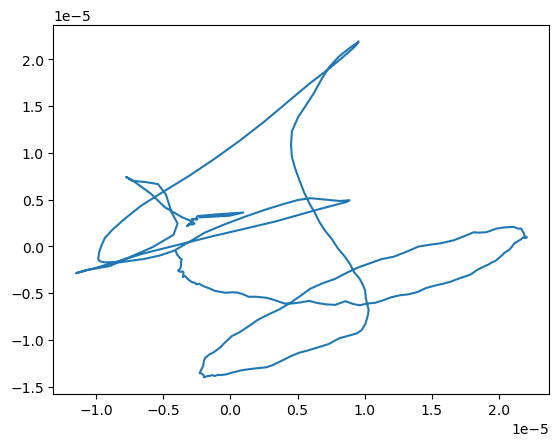

In [199]:
plt.plot((U.T[0] @ avg_data)[100:369],(U.T[1] @ avg_data)[100:369])

In [17]:
import pandas as pd
data_avg = pd.read_csv('UwGr_SEP_prepro.csv', header=None, index_col=0)

In [123]:
#Subject 11 = UwGr

data_paper = pd.read_csv('PlosOne/11_SEP_prepro_-50_130ms.csv', header=None, index_col=0)

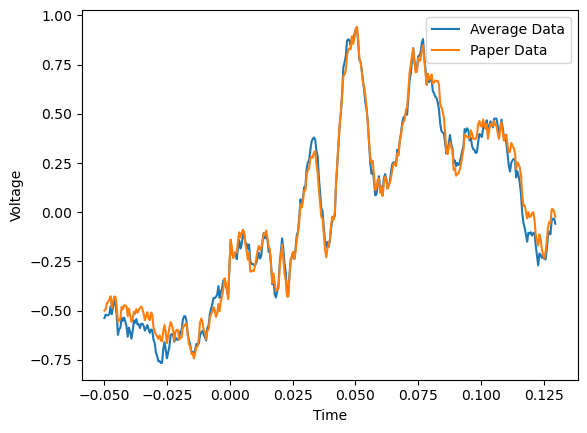

In [45]:
plt.plot(timepoints[:369], data_avg.iloc[100, :369], label='Average Data')
plt.plot(timepoints[:369], data_paper.iloc[100], label='Paper Data')

plt.xlabel('Time')
plt.ylabel('Voltage')
plt.legend()

plt.show()

In [124]:
U_paper, S_paper, Vh_paper = np.linalg.svd(data_paper, full_matrices=True)

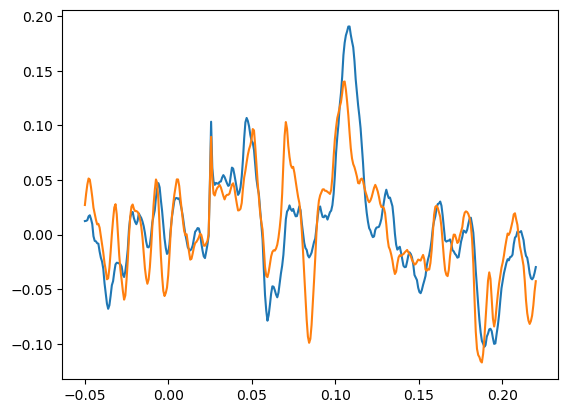

In [147]:
plt.plot(timepoints[:369],-Vh_paper[6],timepoints[:369],Vh[6][:369])


In [191]:
Vh[1] @ ((U.T[1] @ avg_data[:369]))

0.00012521580056989117